# Group Assignment, Modern Data Architectures for Big Data

## Omicron SARS CoV-2 Sentiment Analisis

The purpose of this assignment is to analize the perception of the twitter users about the new Coronavirus variant, Omicron, by performing a sentiment analysis. We will use this notebook to clean the data 

### Step 1. Set-Up

After initializing our Hadoop HDFS, we will import the necessary libraries required for the data preprocessing. We will also set our environment and initialize the SparkSession. 

In [1]:
import findspark
findspark.init()

import matplotlib.pyplot as plt

from wordcloud import WordCloud

import re

import pandas as pd
pd.set_option('display.max_colwidth', None)

import os
os.environ['PYSPARK_SUBMIT_ARGS'] = '--jars /opt/hive3/lib/hive-hcatalog-core-3.1.2.jar pyspark-shell'

from pyspark.sql.session import SparkSession

spark = SparkSession.builder\
.appName("OMICRON - FINAL")\
.config("spark.sql.warehouse.dir","hdfs://localhost:9000/warehouse")\
.config("spark.sql.legacy.timeParserPolicy","LEGACY")\
.config("spark.sql.sources.partitionOverwriteMode","dynamic")\
.enableHiveSupport()\
.getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


### Step 2. Defining the Schema and Reading our Dataframe

Instead of telling Spark to infer the schema of our dataframe, we will set it up before reading the data.

In [2]:
#Defining the Schema
schema="""
created_at string,
id bigint,
id_str string,
text string,
source string,
truncated boolean,
in_reply_to_status_id bigint,
in_reply_to_status_id_str string,
in_reply_to_user_id bigint,
in_reply_to_user_id_str string,
in_reply_to_screen_name string,
`user` struct<
            id:bigint,
            id_str:string,
            name:string,
            screen_name:string,
            location:string,
            url:string,
            description:string,
            protected:boolean,
            verified:boolean,
            followers_count:bigint,
            friends_count:bigint,
            listed_count:bigint,
            favourites_count:bigint,
            statuses_count:bigint,
            created_at:string,
            profile_banner_url:string,
            profile_image_url_https:string,
            default_profile:boolean,
            default_profile_image:boolean,
            withheld_in_countries: array<string>,
            withheld_scope:string,
            geo_enabled:boolean
            >,
coordinates struct <
            coordinates:array<float>,
            type:string
            >,
place struct<
            country:string,
            country_code:string,
            full_name:string,
            place_type:string,
            url:string
            >,
quoted_status_id bigint,
quoted_status_id_str string,
is_quote_status boolean,
quote_count bigint,
reply_count bigint,
retweet_count bigint,
favorite_count bigint,
entities struct<
            user_mentions:array<struct<screen_name:string>>,
            hashtags:array<struct<text:string>>, 
            media:array<struct<expanded_url:string>>, 
            urls:array<struct<expanded_url:string>>, 
            symbols:array<struct<text:string>>
            >,
favorited boolean,
retweeted boolean,
possibly_sensitive boolean,
filter_level string,
lang string
"""

#Reading the dataframe 
omicron_raw = spark.read.schema(schema)\
                       .option("recursiveFileLookup", "true")\
                       .json("hdfs://localhost:9000/datalake/raw/twitter/omicron/")
                       
omicron_raw.limit(5).toPandas()

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,quote_count,reply_count,retweet_count,favorite_count,entities,favorited,retweeted,possibly_sensitive,filter_level,lang
0,Mon Nov 29 14:14:40 +0000 2021,1465323328793624581,1465323328793624581,RT @mohammedhersi: Go get the jab.....its all free. In light of Omicron all the reason. @KEPSA_KENYA . Jikinge. @MOH_Kenya @DrPatrickAmot…,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",False,NaN,None,NaN,None,...,0,0,0,0,"([(mohammedhersi,), (KEPSA_KENYA,), (MOH_Kenya,)], [], None, [], [])",False,False,None,low,en
1,Mon Nov 29 14:14:40 +0000 2021,1465323328567132182,1465323328567132182,"#Africans are saying it started in #Belgium, but because #Elitist_Illuminist #WhiteSupremacistAgenda wants to ban/r… https://t.co/dZbRpoRUGJ","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",True,NaN,None,NaN,None,...,0,0,0,0,"([], [(Africans,), (Belgium,), (Elitist_Illuminist,), (WhiteSupremacistAgenda,)], None, [(https://twitter.com/i/web/status/1465323328567132182,)], [])",False,False,False,low,en
2,Mon Nov 29 14:14:40 +0000 2021,1465323329624100870,1465323329624100870,"RT @benshapiro: So, quick question for the legacy media today: which is more deadly, Omicron, or unmanned SUVs?","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,NaN,None,NaN,None,...,0,0,0,0,"([(benshapiro,)], [], None, [], [])",False,False,None,low,en
3,Mon Nov 29 14:14:40 +0000 2021,1465323329645162500,1465323329645162500,@LiamThorpECHO I hope this is just a coincidence but OMICRON is an anagram of MORONIC,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",False,1.464945e+18,1464945276456783875,1.444111e+09,1444110548,...,0,0,0,0,"([(LiamThorpECHO,)], [], None, [], [])",False,False,None,low,en
4,Mon Nov 29 14:14:40 +0000 2021,1465323330316095494,1465323330316095494,"ahem #Omicron \nlike to reiterate my fav line :""The smart are being led by the stupid...""\n#COVID19","<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",False,NaN,None,NaN,None,...,0,0,0,0,"([], [(Omicron,), (COVID19,)], None, [], [])",False,False,None,low,en


### Step 3. Transforming the Dataframe

The "Created_at" column is stored as a string, so we will transform it to a timestamp.

In [3]:
import pyspark.sql.functions as F
omicron_std = omicron_raw\
             .withColumn("created_at",F.to_timestamp(F.col("created_at"),"EEE MMM dd HH:mm:ss ZZZZZ yyyy"))\
             .withColumn("year",F.year("created_at"))\
             .withColumn("dt",F.to_date("created_at"))
                
omicron_std.limit(5).toPandas()

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,retweet_count,favorite_count,entities,favorited,retweeted,possibly_sensitive,filter_level,lang,year,dt
0,2021-11-29 15:14:40,1465323328793624581,1465323328793624581,RT @mohammedhersi: Go get the jab.....its all free. In light of Omicron all the reason. @KEPSA_KENYA . Jikinge. @MOH_Kenya @DrPatrickAmot…,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",False,NaN,None,NaN,None,...,0,0,"([(mohammedhersi,), (KEPSA_KENYA,), (MOH_Kenya,)], [], None, [], [])",False,False,None,low,en,2021,2021-11-29
1,2021-11-29 15:14:40,1465323328567132182,1465323328567132182,"#Africans are saying it started in #Belgium, but because #Elitist_Illuminist #WhiteSupremacistAgenda wants to ban/r… https://t.co/dZbRpoRUGJ","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",True,NaN,None,NaN,None,...,0,0,"([], [(Africans,), (Belgium,), (Elitist_Illuminist,), (WhiteSupremacistAgenda,)], None, [(https://twitter.com/i/web/status/1465323328567132182,)], [])",False,False,False,low,en,2021,2021-11-29
2,2021-11-29 15:14:40,1465323329624100870,1465323329624100870,"RT @benshapiro: So, quick question for the legacy media today: which is more deadly, Omicron, or unmanned SUVs?","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,NaN,None,NaN,None,...,0,0,"([(benshapiro,)], [], None, [], [])",False,False,None,low,en,2021,2021-11-29
3,2021-11-29 15:14:40,1465323329645162500,1465323329645162500,@LiamThorpECHO I hope this is just a coincidence but OMICRON is an anagram of MORONIC,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",False,1.464945e+18,1464945276456783875,1.444111e+09,1444110548,...,0,0,"([(LiamThorpECHO,)], [], None, [], [])",False,False,None,low,en,2021,2021-11-29
4,2021-11-29 15:14:40,1465323330316095494,1465323330316095494,"ahem #Omicron \nlike to reiterate my fav line :""The smart are being led by the stupid...""\n#COVID19","<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",False,NaN,None,NaN,None,...,0,0,"([], [(Omicron,), (COVID19,)], None, [], [])",False,False,None,low,en,2021,2021-11-29


### Step 4. Promoting the Dataframe to the Standard Layer

In [4]:
(omicron_std.coalesce(1)
          .write
          .partitionBy("year","dt")
          .mode("overwrite")
          .parquet("hdfs://localhost:9000/datalake/std/twitter/omicron/"))

### Step 5. Initial Analysis

We will begin our analysis by gathering some information about our dataframe.

#### Step 5.0

In order to understand the data in our dataframe we will print the output of the first row.

In [5]:
for i in omicron_std.limit(5).toPandas().columns:
    print(i, omicron_std.limit(5).toPandas()[i][0])

created_at 2021-11-29 15:14:40
id 1465323328793624581
id_str 1465323328793624581
text RT @mohammedhersi: Go get the jab.....its all free. In light of Omicron  all the reason.  @KEPSA_KENYA . Jikinge. @MOH_Kenya @DrPatrickAmot…
source <a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>
truncated False
in_reply_to_status_id nan
in_reply_to_status_id_str None
in_reply_to_user_id nan
in_reply_to_user_id_str None
in_reply_to_screen_name None
user Row(id=926041375040327682, id_str='926041375040327682', name='Winnie Wambugu', screen_name='winnienwambugu', location='Kenya', url=None, description='Associate Director', protected=False, verified=False, followers_count=336, friends_count=308, listed_count=2, favourites_count=1765, statuses_count=537, created_at='Thu Nov 02 11:00:43 +0000 2017', profile_banner_url=None, profile_image_url_https='https://pbs.twimg.com/profile_images/1231191958137208832/JmXDtVqv_normal.jpg', default_profile=True, default_profile_image=

#### Step 5.1 
First we will transform our spark dataframe to a pandas dataframe to determine the ratio of original tweets vs retweets.

In [6]:
from pyspark.sql import *
omicron_std.limit(5).toPandas()

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,retweet_count,favorite_count,entities,favorited,retweeted,possibly_sensitive,filter_level,lang,year,dt
0,2021-11-29 15:14:40,1465323328793624581,1465323328793624581,RT @mohammedhersi: Go get the jab.....its all free. In light of Omicron all the reason. @KEPSA_KENYA . Jikinge. @MOH_Kenya @DrPatrickAmot…,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",False,NaN,None,NaN,None,...,0,0,"([(mohammedhersi,), (KEPSA_KENYA,), (MOH_Kenya,)], [], None, [], [])",False,False,None,low,en,2021,2021-11-29
1,2021-11-29 15:14:40,1465323328567132182,1465323328567132182,"#Africans are saying it started in #Belgium, but because #Elitist_Illuminist #WhiteSupremacistAgenda wants to ban/r… https://t.co/dZbRpoRUGJ","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",True,NaN,None,NaN,None,...,0,0,"([], [(Africans,), (Belgium,), (Elitist_Illuminist,), (WhiteSupremacistAgenda,)], None, [(https://twitter.com/i/web/status/1465323328567132182,)], [])",False,False,False,low,en,2021,2021-11-29
2,2021-11-29 15:14:40,1465323329624100870,1465323329624100870,"RT @benshapiro: So, quick question for the legacy media today: which is more deadly, Omicron, or unmanned SUVs?","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,NaN,None,NaN,None,...,0,0,"([(benshapiro,)], [], None, [], [])",False,False,None,low,en,2021,2021-11-29
3,2021-11-29 15:14:40,1465323329645162500,1465323329645162500,@LiamThorpECHO I hope this is just a coincidence but OMICRON is an anagram of MORONIC,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",False,1.464945e+18,1464945276456783875,1.444111e+09,1444110548,...,0,0,"([(LiamThorpECHO,)], [], None, [], [])",False,False,None,low,en,2021,2021-11-29
4,2021-11-29 15:14:40,1465323330316095494,1465323330316095494,"ahem #Omicron \nlike to reiterate my fav line :""The smart are being led by the stupid...""\n#COVID19","<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",False,NaN,None,NaN,None,...,0,0,"([], [(Omicron,), (COVID19,)], None, [], [])",False,False,None,low,en,2021,2021-11-29


The function below will check for the specific string 'RT @' to check wether the tweet is an original one or a retweet.

In [7]:
omicron_std = omicron_std.withColumn('is_RT', F.when(omicron_std["text"].like("RT @%"), 'Retweet').otherwise('Original'))
omicron_std.limit(5).toPandas()

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,favorite_count,entities,favorited,retweeted,possibly_sensitive,filter_level,lang,year,dt,is_RT
0,2021-11-29 15:14:40,1465323328793624581,1465323328793624581,RT @mohammedhersi: Go get the jab.....its all free. In light of Omicron all the reason. @KEPSA_KENYA . Jikinge. @MOH_Kenya @DrPatrickAmot…,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",False,NaN,None,NaN,None,...,0,"([(mohammedhersi,), (KEPSA_KENYA,), (MOH_Kenya,)], [], None, [], [])",False,False,None,low,en,2021,2021-11-29,Retweet
1,2021-11-29 15:14:40,1465323328567132182,1465323328567132182,"#Africans are saying it started in #Belgium, but because #Elitist_Illuminist #WhiteSupremacistAgenda wants to ban/r… https://t.co/dZbRpoRUGJ","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",True,NaN,None,NaN,None,...,0,"([], [(Africans,), (Belgium,), (Elitist_Illuminist,), (WhiteSupremacistAgenda,)], None, [(https://twitter.com/i/web/status/1465323328567132182,)], [])",False,False,False,low,en,2021,2021-11-29,Original
2,2021-11-29 15:14:40,1465323329624100870,1465323329624100870,"RT @benshapiro: So, quick question for the legacy media today: which is more deadly, Omicron, or unmanned SUVs?","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,NaN,None,NaN,None,...,0,"([(benshapiro,)], [], None, [], [])",False,False,None,low,en,2021,2021-11-29,Retweet
3,2021-11-29 15:14:40,1465323329645162500,1465323329645162500,@LiamThorpECHO I hope this is just a coincidence but OMICRON is an anagram of MORONIC,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",False,1.464945e+18,1464945276456783875,1.444111e+09,1444110548,...,0,"([(LiamThorpECHO,)], [], None, [], [])",False,False,None,low,en,2021,2021-11-29,Original
4,2021-11-29 15:14:40,1465323330316095494,1465323330316095494,"ahem #Omicron \nlike to reiterate my fav line :""The smart are being led by the stupid...""\n#COVID19","<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",False,NaN,None,NaN,None,...,0,"([], [(Omicron,), (COVID19,)], None, [], [])",False,False,None,low,en,2021,2021-11-29,Original


Afterwards we will plot the total retweets vs the total original tweets using matplotlib.

In [8]:
graph_is_rt = omicron_std.groupBy('is_RT').count().orderBy('count').toPandas().set_index('is_RT')
graph_is_rt

,count
is_RT,
Original,1353
Retweet,3761


Text(0.5, 1.0, 'Retweets vs Original Tweets')

<Figure size 432x288 with 0 Axes>

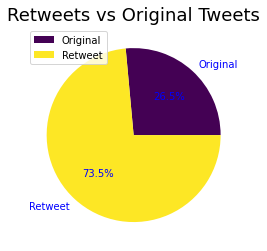

In [9]:
plt.figure()
graph_is_rt.plot(kind="pie", cmap='viridis', subplots = 'True',  autopct='%1.1f%%', textprops={'color':"b"})

    
plt.xlabel('', fontsize=16)
plt.ylabel('', fontsize=16)
plt.title('Retweets vs Original Tweets', fontsize = 18)

#### Step 5.2
We will now determine which hashtags are the most popular within our dataset. Afterwards we will plot a wordclud containing the most popular hashtags.

To achieve this, we will use a function that selects all the hashtags, groups by themselves and applies the aggregate function "count" to obtain the number of times each hashtag appears in our dataframe in lowercase.

In [10]:
from pyspark.sql.functions import *
hashtags_grouped = (omicron_std
      .select(explode("entities.hashtags.text").alias("hashtag"))
      .groupBy(lower("hashtag").alias('hashtag'))
      .agg(count("*").alias("total"))
      .orderBy(desc("total")))
      
hashtags_grouped.limit(10).toPandas()

,hashtag,total
0,omicron,339
1,omicronvariant,193
2,covid19,92
3,southafrica,23
4,covid,22
5,covidvariant,11
6,mufc,9
7,breaking,9
8,lockdown,8
9,who,7


Text(0.5, 1.0, '10 Most Popular Hashtags')

<Figure size 432x288 with 0 Axes>

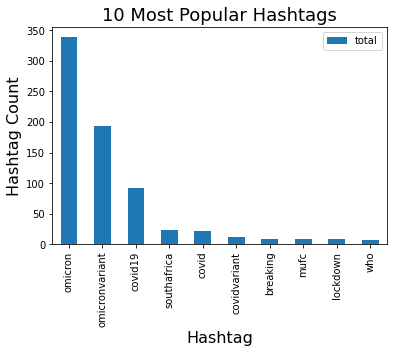

In [11]:
hashtags_graph = hashtags_grouped.limit(10).toPandas().set_index('hashtag')
plt.figure()
hashtags_graph.plot(kind="bar", cmap='tab20')

plt.xlabel('Hashtag', fontsize=16)
plt.ylabel('Hashtag Count', fontsize=16)
plt.title('10 Most Popular Hashtags', fontsize = 18)

In [12]:
hashtags = (omicron_std.select(explode("entities.hashtags.text").alias("hashtag")))

hashtags=hashtags.withColumn('hashtag', lower(col('hashtag')))

In [13]:
text = " ".join(i for i in hashtags.toPandas()['hashtag'].astype(str))

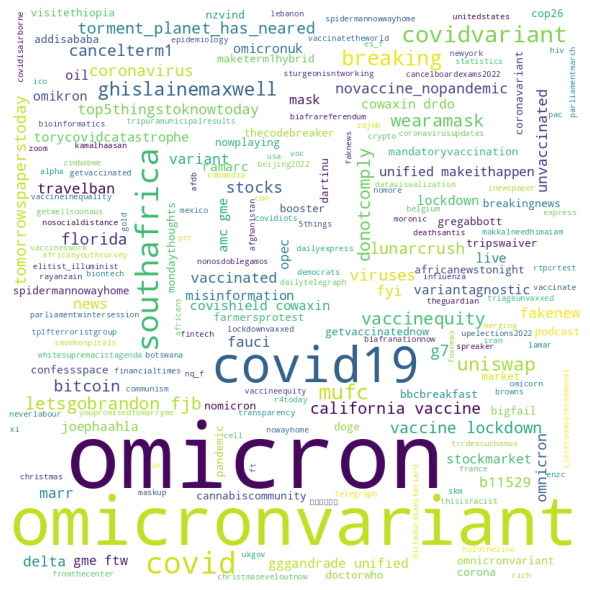

In [14]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(text)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

#### Step 5.3
Now we will look at the most popular accounts mentioned in the tweets.

First we will use a function that selects all the twitter accounts, groups by themselves and applies the aggregate function "count" to obtain the number of times each account appears in our dataframe.

In [15]:
handles_grouped = (omicron_std
      .select(explode("entities.user_mentions.screen_name").alias("handles"))
      .groupBy("handles")
      .agg(count("*").alias("total"))
      .orderBy(desc("total")))
      
handles_grouped.limit(10).toPandas()

,handles,total
0,benshapiro,310
1,MartinSLewis,104
2,TheMarcitect,80
3,owenbarder,68
4,RWMaloneMD,68
5,DrEricDing,45
6,brithume,40
7,AITCofficial,39
8,BNODesk,37
9,Reuters,35


Text(0.5, 1.0, '10 Most Popular Handles')

<Figure size 432x288 with 0 Axes>

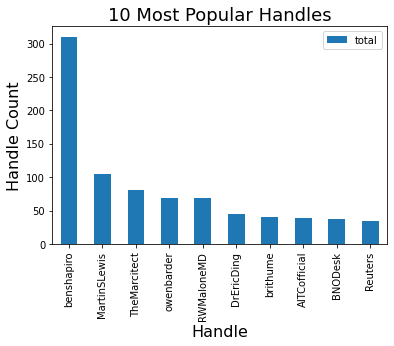

In [16]:
handles_graph = handles_grouped.limit(10).toPandas().set_index('handles')
plt.figure()
handles_graph.plot(kind="bar", cmap='tab20')

plt.xlabel('Handle', fontsize=16)
plt.ylabel('Handle Count', fontsize=16)
plt.title('10 Most Popular Handles', fontsize = 18)

In [17]:
handles = (omicron_std.select(explode("entities.user_mentions.screen_name").alias("handle")))

handles = handles.withColumn('handle', col('handle'))

In [18]:
text = " ".join(i for i in handles.toPandas()['handle'].astype(str))

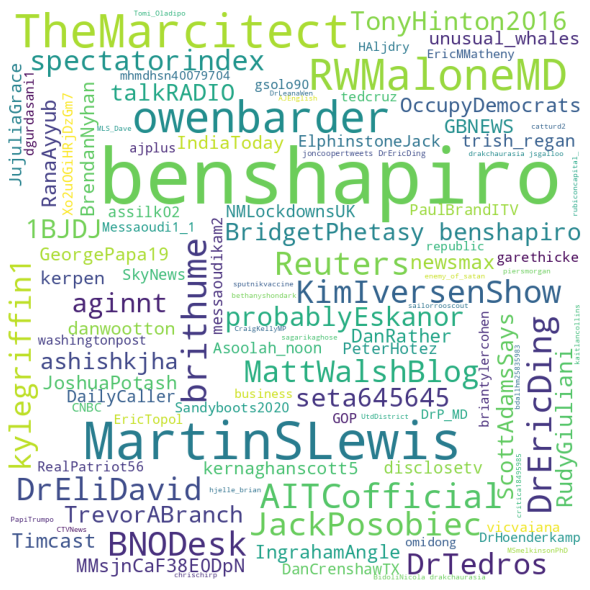

In [19]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(text)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [20]:
omicron_std.limit(5).toPandas()

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,favorite_count,entities,favorited,retweeted,possibly_sensitive,filter_level,lang,year,dt,is_RT
0,2021-11-29 15:14:40,1465323328793624581,1465323328793624581,RT @mohammedhersi: Go get the jab.....its all free. In light of Omicron all the reason. @KEPSA_KENYA . Jikinge. @MOH_Kenya @DrPatrickAmot…,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",False,NaN,None,NaN,None,...,0,"([(mohammedhersi,), (KEPSA_KENYA,), (MOH_Kenya,)], [], None, [], [])",False,False,None,low,en,2021,2021-11-29,Retweet
1,2021-11-29 15:14:40,1465323328567132182,1465323328567132182,"#Africans are saying it started in #Belgium, but because #Elitist_Illuminist #WhiteSupremacistAgenda wants to ban/r… https://t.co/dZbRpoRUGJ","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",True,NaN,None,NaN,None,...,0,"([], [(Africans,), (Belgium,), (Elitist_Illuminist,), (WhiteSupremacistAgenda,)], None, [(https://twitter.com/i/web/status/1465323328567132182,)], [])",False,False,False,low,en,2021,2021-11-29,Original
2,2021-11-29 15:14:40,1465323329624100870,1465323329624100870,"RT @benshapiro: So, quick question for the legacy media today: which is more deadly, Omicron, or unmanned SUVs?","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,NaN,None,NaN,None,...,0,"([(benshapiro,)], [], None, [], [])",False,False,None,low,en,2021,2021-11-29,Retweet
3,2021-11-29 15:14:40,1465323329645162500,1465323329645162500,@LiamThorpECHO I hope this is just a coincidence but OMICRON is an anagram of MORONIC,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",False,1.464945e+18,1464945276456783875,1.444111e+09,1444110548,...,0,"([(LiamThorpECHO,)], [], None, [], [])",False,False,None,low,en,2021,2021-11-29,Original
4,2021-11-29 15:14:40,1465323330316095494,1465323330316095494,"ahem #Omicron \nlike to reiterate my fav line :""The smart are being led by the stupid...""\n#COVID19","<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",False,NaN,None,NaN,None,...,0,"([], [(Omicron,), (COVID19,)], None, [], [])",False,False,None,low,en,2021,2021-11-29,Original


### Step 6. Sentiment Analysis

#### Step 6.1 Data Cleansing

We will use two diferent algorithms to determine the sentiment behind the tweets in the dataset, but in order to properly implement these algoriths, we will first clean the dataset according to the following rules:

##### Rule 1. Most of the tweets are Retweets, so we will remove the RT and the following handle.

##### Rule 2 All twitter handles must be removed from the text.

##### Rule 3. All hashtags must be removed from the text.

##### Rule 4. All URLs must be removed.

##### Rule 5. Punctuation does not offer any information, so it will be removed as well.

##### Rule 6. All words must be lowercase.

Using the following regular expressions, we will create 6 new columns, which will apply the aforementioned rules to our dataframe

In [21]:
omicron_std = omicron_std.withColumn("text_no_rt", F.regexp_replace("text", r'RT @\w+: ', " ")) #Removes RT and the following handle
omicron_std = omicron_std.withColumn("text_no_handle", F.regexp_replace("text_no_rt", r'(@[A-Za-z0-9_-]+)', " ")) #Removes handles
omicron_std = omicron_std.withColumn("text_no_hashtags", F.regexp_replace("text_no_handle", r'(#[A-Za-z0-9_-]+)', " ")) #Removes hashtags
omicron_std = omicron_std.withColumn("text_no_urls", F.regexp_replace("text_no_hashtags", r'(\w+:\/\/\S+)', " ")) #Removes urls
omicron_std = omicron_std.withColumn("text_no_punct", F.regexp_replace("text_no_urls", r'[\.\,\!\?\:\;\-\=\"]', " ")) #Removes punctuation
omicron_std = omicron_std.withColumn('text_lower', lower(col('text_no_punct'))) #lower cases everything

#### Step 6.2 Applying the Algorithm

We will use two diferent Sentiment intensity analyzers to extract a negative, neutral and positive score for each tweet. The aforementioned scores are also compounded into a single score, ranging from -1 (negative sentiment) to +1 (positive sentiment)

The sentiment intensity analyzers are the following:

NLTK (Natural Language Toolkit's) VADER (Valence Aware Dictionary and sEntiment Reasoner)

vaderSentiment's VADER (Valence Aware Dictionary and sEntiment Reasoner)

In [22]:
from nltk.sentiment import vader
from vaderSentiment import vaderSentiment

nltk = vader.SentimentIntensityAnalyzer()
vader = vaderSentiment.SentimentIntensityAnalyzer()

In order to use both SIA in the Spark dataframe, we will create two user defined functions and apply these functions to the 'text_lower' column, which represents our last transformation

In [23]:
from pyspark.sql.functions import udf
from pyspark.sql.types import MapType, StringType, FloatType

nltk_polaritytUDF = udf(lambda z: nltk.polarity_scores(z), MapType(StringType(), FloatType()))
vaderS_polarityUDF = udf(lambda z: vader.polarity_scores(z), MapType(StringType(), FloatType()))

omicron_std = omicron_std.withColumn('nltk', nltk_polaritytUDF(omicron_std['text_lower']))
omicron_std = omicron_std.withColumn('vader', vaderS_polarityUDF(omicron_std['text_lower']))

In [24]:
omicron_std.limit(10).toPandas()

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,dt,is_RT,text_no_rt,text_no_handle,text_no_hashtags,text_no_urls,text_no_punct,text_lower,nltk,vader
0,2021-11-29 15:14:40,1465323328793624581,1465323328793624581,RT @mohammedhersi: Go get the jab.....its all free. In light of Omicron all the reason. @KEPSA_KENYA . Jikinge. @MOH_Kenya @DrPatrickAmot…,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",False,NaN,None,NaN,None,...,2021-11-29,Retweet,Go get the jab.....its all free. In light of Omicron all the reason. @KEPSA_KENYA . Jikinge. @MOH_Kenya @DrPatrickAmot…,Go get the jab.....its all free. In light of Omicron all the reason. . Jikinge. …,Go get the jab.....its all free. In light of Omicron all the reason. . Jikinge. …,Go get the jab.....its all free. In light of Omicron all the reason. . Jikinge. …,Go get the jab its all free In light of Omicron all the reason Jikinge …,go get the jab its all free in light of omicron all the reason jikinge …,"{'neg': 0.0, 'pos': 0.19099999964237213, 'compound': 0.5105999708175659, 'neu': 0.8090000152587891}","{'neg': 0.0, 'pos': 0.18000000715255737, 'compound': 0.5105999708175659, 'neu': 0.8199999928474426}"
1,2021-11-29 15:14:40,1465323328567132182,1465323328567132182,"#Africans are saying it started in #Belgium, but because #Elitist_Illuminist #WhiteSupremacistAgenda wants to ban/r… https://t.co/dZbRpoRUGJ","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",True,NaN,None,NaN,None,...,2021-11-29,Original,"#Africans are saying it started in #Belgium, but because #Elitist_Illuminist #WhiteSupremacistAgenda wants to ban/r… https://t.co/dZbRpoRUGJ","#Africans are saying it started in #Belgium, but because #Elitist_Illuminist #WhiteSupremacistAgenda wants to ban/r… https://t.co/dZbRpoRUGJ","are saying it started in , but because wants to ban/r… https://t.co/dZbRpoRUGJ","are saying it started in , but because wants to ban/r…",are saying it started in but because wants to ban/r…,are saying it started in but because wants to ban/r…,"{'neg': 0.0, 'pos': 0.0, 'compound': 0.0, 'neu': 1.0}","{'neg': 0.0, 'pos': 0.0, 'compound': 0.0, 'neu': 1.0}"
2,2021-11-29 15:14:40,1465323329624100870,1465323329624100870,"RT @benshapiro: So, quick question for the legacy media today: which is more deadly, Omicron, or unmanned SUVs?","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,NaN,None,NaN,None,...,2021-11-29,Retweet,"So, quick question for the legacy media today: which is more deadly, Omicron, or unmanned SUVs?","So, quick question for the legacy media today: which is more deadly, Omicron, or unmanned SUVs?","So, quick question for the legacy media today: which is more deadly, Omicron, or unmanned SUVs?","So, quick question for the legacy media today: which is more deadly, Omicron, or unmanned SUVs?",So quick question for the legacy media today which is more deadly Omicron or unmanned SUVs,so quick question for the legacy media today which is more deadly omicron or unmanned suvs,"{'neg': 0.0, 'pos': 0.0, 'compound': 0.0, 'neu': 1.0}","{'neg': 0.0, 'pos': 0.0, 'compound': 0.0, 'neu': 1.0}"
3,2021-11-29 15:14:40,1465323329645162500,1465323329645162500,@LiamThorpECHO I hope this is just a coincidence but OMICRON is an anagram of MORONIC,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",False,1.464945e+18,1464945276456783875,1.444111e+09,1444110548,...,2021-11-29,Original,@LiamThorpECHO I hope this is just a coincidence but OMICRON is an anagram of MORONIC,I hope this is just a coincidence but OMICRON is an anagram of MORONIC,I hope this is just a coincidence but OMICRON is an anagram of MORONIC,I hope this is just a coincidence but OMICRON is an anagram of MORONIC,I hope this is just a coincidence but OMICRON is an anagram of MORONIC,i hope this is just a coincidence but 

As emojis also carry sentiment, we will analyze wether any of our SIAs actually carry this sentiment into their calculations.

In [25]:
import emojis

@udf("array<string>")
def get_emojis_udf(s):
    set = emojis.get(s)
    return [*set, ]

emoji_df = omicron_std.select(explode(get_emojis_udf("text_lower")).alias("emoji"))\
      .groupBy("emoji").agg(count("*").alias("total")).orderBy(desc("total")).limit(20)

emoji_df = emoji_df.withColumn('nltk', nltk_polaritytUDF(emoji_df['emoji']))
emoji_df = emoji_df.withColumn('vader', vaderS_polarityUDF(emoji_df['emoji']))

emoji_df.toPandas()

,emoji,total,nltk,vader
0,👇,34,"{'neg': 0.0, 'pos': 0.0, 'compound': 0.0, 'neu': 0.0}","{'neg': 0.0, 'pos': 0.0, 'compound': 0.0, 'neu': 1.0}"
1,🇳🇱,25,"{'neg': 0.0, 'pos': 0.0, 'compound': 0.0, 'neu': 1.0}","{'neg': 0.0, 'pos': 0.0, 'compound': 0.0, 'neu': 1.0}"
2,✈️,24,"{'neg': 0.0, 'pos': 0.0, 'compound': 0.0, 'neu': 1.0}","{'neg': 0.0, 'pos': 0.0, 'compound': 0.0, 'neu': 1.0}"
3,🎥,23,"{'neg': 0.0, 'pos': 0.0, 'compound': 0.0, 'neu': 0.0}","{'neg': 0.0, 'pos': 0.0, 'compound': 0.0, 'neu': 1.0}"
4,🚨,22,"{'neg': 0.0, 'pos': 0.0, 'compound': 0.0, 'neu': 0.0}","{'neg': 0.0, 'pos': 0.0, 'compound': 0.0, 'neu': 1.0}"
5,🎬,22,"{'neg': 0.0, 'pos': 0.0, 'compound': 0.0, 'neu': 0.0}","{'neg': 0.0, 'pos': 0.0, 'compound': 0.0, 'neu': 1.0}"
6,📽️,22,"{'neg': 0.0, 'pos': 0.0, 'compound': 0.0, 'neu': 1.0}","{'neg': 0.0, 'pos': 0.0, 'compound': 0.0, 'neu': 1.0}"
7,😷,16,"{'neg': 0.0, 'pos': 0.0, 'compound': 0.0, 'neu': 0.0}","{'neg': 0.0, 'pos': 0.0, 'compound': 0.0, 'neu': 1.0}"
8,🇿🇦,10,"{'neg': 0.0, 'pos': 0.0, 'compound': 0.0, 'neu': 1.0}","{'neg': 0.0, 'pos': 0.0, 'compound': 0.0, 'neu': 1.0}"
9,💉,9,"{'neg': 0.0, 'pos': 0.0, 'compound': 0.0, 'neu': 0.0}","{'neg': 0.0, 'pos': 0.0, 'compound': 0.0, 'neu': 1.0}"


Text(0.5, 1.0, 'Most Popular Emojis')

<Figure size 432x288 with 0 Axes>

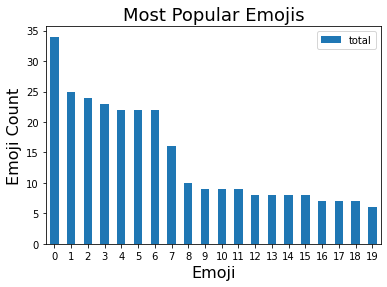

In [26]:
plt.figure()
axis = emoji_df.toPandas().plot(kind="bar", cmap='tab20')

plt.xlabel('Emoji', fontsize=16)
plt.ylabel('Emoji Count', fontsize=16)
axis.set_xticklabels(labels = emoji_df.toPandas().index.values, rotation=0, fontsize=10)
plt.title('Most Popular Emojis', fontsize = 18)

Most of the emojis carry no sentiment on both of the SIAs, but the vaderSentiment analyzer takes into account some of them, thus we will leave the emojis in the dataframe.

#### Step 6.3 Results

Using the compound scores of both Sentiment Intensity Analizers, we are able to plot the results of our dataframe's overall sentiment

In [27]:
omicron_std.limit(5).toPandas().nltk[0]['compound']

0.5105999708175659

In [28]:
omicron_std = omicron_std.withColumn('nltk_comp', col('nltk')['compound'])
omicron_std = omicron_std.withColumn('vader_comp', col('vader').compound)

In [29]:
nltk_comp = omicron_std.select('nltk_comp').toPandas()

Text(0.5, 1.0, 'NLTK Sentiment Values')

<Figure size 432x288 with 0 Axes>

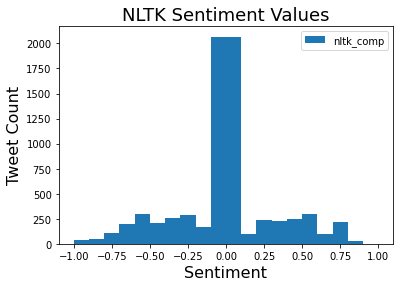

In [30]:
nltk_comp = omicron_std.select('nltk_comp').toPandas()
plt.figure()

#nltk_comp = nltk_comp[nltk_comp['vader_comp'] != 0]
axis = nltk_comp.plot(kind="hist", cmap='tab20', bins=[-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2,\
                                                        -0.1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])


plt.xlabel('Sentiment', fontsize=16)
plt.ylabel('Tweet Count', fontsize=16)
plt.title('NLTK Sentiment Values', fontsize = 18)

Text(0.5, 1.0, 'NLTK Sentiment Values')

<Figure size 432x288 with 0 Axes>

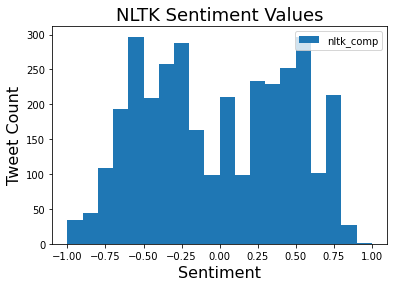

In [31]:
nltk_comp = omicron_std.select('nltk_comp').toPandas()
plt.figure()

nltk_comp = nltk_comp[nltk_comp['nltk_comp'] != 0]
axis = nltk_comp.plot(kind="hist", cmap='tab20', bins=[-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2,\
                                                        -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])


plt.xlabel('Sentiment', fontsize=16)
plt.ylabel('Tweet Count', fontsize=16)
plt.title('NLTK Sentiment Values', fontsize = 18)

Text(0.5, 1.0, 'Vader Sentiment Values')

<Figure size 432x288 with 0 Axes>

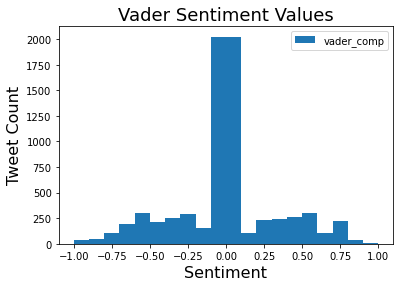

In [32]:
vader_comp = omicron_std.select('vader_comp').toPandas()
plt.figure()
# Remove polarity values equal to zero
# vader_comp = vader_comp[vader_comp['vader_comp'] != 0]
axis = vader_comp.plot(kind="hist", cmap='tab20', bins=[-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2,\
                                                        -0.1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

plt.xlabel('Sentiment', fontsize=16)
plt.ylabel('Tweet Count', fontsize=16)
plt.title('Vader Sentiment Values', fontsize = 18)

Text(0.5, 1.0, 'Vader Sentiment Values')

<Figure size 432x288 with 0 Axes>

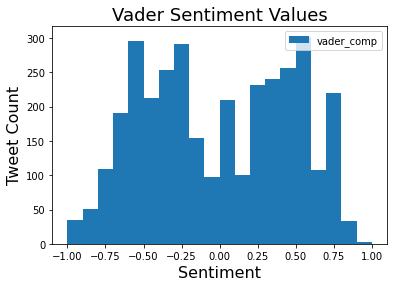

In [33]:
vader_comp = omicron_std.select('vader_comp').toPandas()
plt.figure()
# Remove polarity values equal to zero
vader_comp = vader_comp[vader_comp['vader_comp'] != 0]
axis = vader_comp.plot(kind="hist", cmap='tab20', bins=[-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2,\
                                                        -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

plt.xlabel('Sentiment', fontsize=16)
plt.ylabel('Tweet Count', fontsize=16)
plt.title('Vader Sentiment Values', fontsize = 18)